## Gradient descent methods
#### 
introduction

#### 1.1 A simple quadratic function
Let's start by numerically optimize a simple two-dimensional function $ f(x) = x^2_1+x^2_2, \ x \in \R^", \ x= (x_1, x_2)^T. $ Since it's a convex function (we can notice it by the positive sign of the coefficient of x^2) it will have a single minimum, found where $ \nabla f(x) = 0$. Let's now find where the gradient is equal to zero.

$ \nabla f(x)= \Big( \frac{\partial f}{\partial x_{1}}, \frac{\partial f}{\partial x_{2}}\Big)^T =(2x_{1},2x_{2})^T \\ 
\nabla f(x)=0 \\
\frac{\partial f}{\partial x_{1} = 2x_1 = 0, \ x_1 = 0 \\
\frac{\partial f}{\partial x_{2} = 2x_2 = 0, \ x_2 = 0
$ 

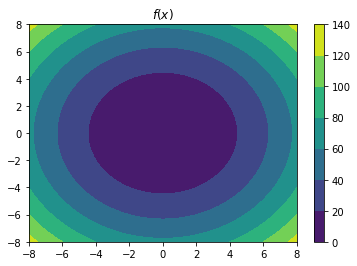

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Countour plot of fA(x)
x = np.linspace(-8.0, 8.0, 100)
y = np.linspace(-8.0, 8.0, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('$f(x)$')
plt.show()

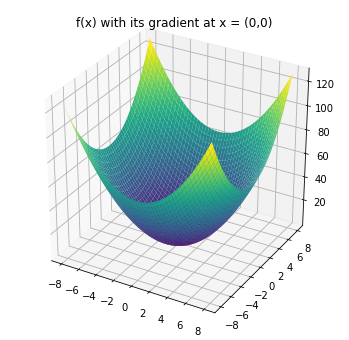

In [23]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-8,8,50)
x2=np.linspace(-8,8,50)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)
eq = 0*X+0*Y

#ax.plot_surface(X, Y, eq)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with its gradient at x = (0,0)')
plt.show()

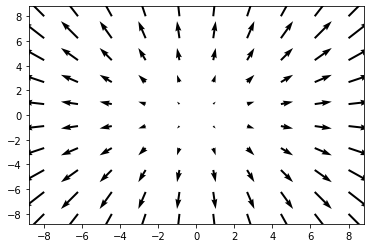

In [68]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-8,8,10),np.linspace(-8,8,10))

u = 2*x
v = 2*y

plt.quiver(x,y,u,v)
plt.show()

#### 1.2 A function with multiple minima
Let's now analyze the function $ f(x_1, x_2) = x_1^2(4-2.1x_1^2+\frac{1}{3}x_1^4) + x_1x_2+x_2^2(-4+4x_2^2) $

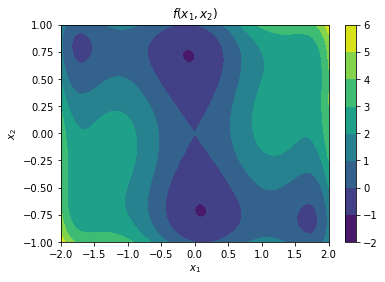

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.show()

# As extra, try stocastic gradient descent.

Looking at the contour plot, we can guess that the two most frequent minima that will be found are the ones in the center of the plot, although it will depend on where we start, if for example our $x^0$ will be close to the bottom-right corner or top-left one, the found minima will probably be a local one, and not the global ones. Now we will use the simple gradient descent with 100 iterations to illustrate different paths of the algorithm.

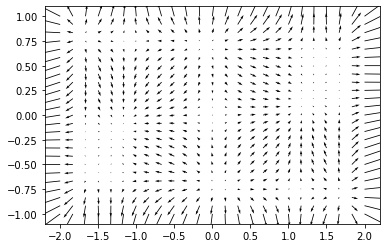

In [70]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-2,2,25),np.linspace(-1,1,25))

u = 8*x-8.4*x**3+2*x**5+y
v = x-8*y+16*y**3

plt.quiver(x,y,u,v)
plt.show()


In [16]:
def f(x1, x2):
    return x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 

def gradf(fxy):
    return np.array([8*fxy[0]-8.4*fxy[0]**3+2*fxy[0]**5+fxy[1], fxy[0]-8*fxy[1]+16*fxy[1]**3])

x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)

def grad_descent(x1, x2, alpha, iter):
    pair = np.array([x1, x2])
    points = [[x1, x2]]
    for i in range(iter):
        pair = pair - alpha*gradf(pair) 
        points.append([pair[0], pair[1]])
    return points

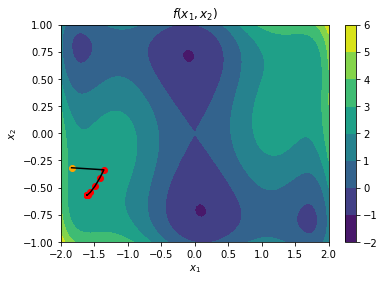

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)
points = grad_descent(x01, x02, 0.1, 100)
lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points)):
    if i == 0:
        plt.scatter(points[i][0], points[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points[i][0], points[i][1], color='r')
plt.show()

# As extra, try stocastic gradient descent.

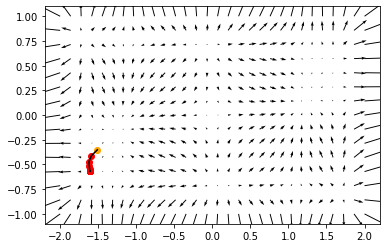

In [83]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-2,2,30),np.linspace(-1,1,15))

u = 8*x-8.4*x**3+2*x**5+y
v = x-8*y+16*y**3

plt.quiver(x,y,u,v)
x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)
points = grad_descent(x01, x02, 0.1, 100)
lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points)):
    if i == 0:
        plt.scatter(points[i][0], points[i][1], color='orange')
    else:
        plt.scatter(points[i][0], points[i][1], color='r')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# function definition
def fxz(X,Y):
    Z = []
    for x in range(len(X)):
        Z.append([])
        for y in range(len(X[0])):
          Z[-1].append(function(X[x][y], Y[x][y]))            
    return Z

def function(x1,x2):
  return x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2)

# Grid for plotting in the search space
x1 = np.linspace(-2, 2,40) 
x2 = np.linspace(-1, 1,20) 
X1, X2 = np.meshgrid(x1, x2)
Z = fxz(X1,X2)

# plotting layout
fig = go.Figure(data=[go.Surface(x=X1, y=X2, z = Z)])

#fig = go.figure(data[go.])


fig.update_layout(title='f(x1,x2)', autosize=False,
                  width=700, height=700,
                  margin=dict(l=20, r=20, b=20, t=20))

fig.update_layout(scene = dict(
                    xaxis_title='x1',
                    yaxis_title='x2',
                    zaxis_title='z'),
                    width=500,
                    height=700,
                    margin=dict(r=40, b=40, l=40, t=40))

fig.show()

Now we will try a different approach,slightly more compliacted than the previous one. The advantage of using backtracking algorithms is that we can adjust the step size while executing the gradient descent, the new algorithm will perform two checks for each iteration. 

(a) the first one will check if the convergence criteria is statisfied, if the proposed value of $\alpha^k$ reduces the value of the function evaluated at $x^k$, where k is the iteration number
(b) if the first point is not satisfied we have to update $ \alpha^k = \frac{\alpha^k}{2}$ and then we repeat the first check.

In [12]:
import numpy as np
def function(x):
  return x[0]**2 * (4 - 2.1 * x[0]**2 + (1/3 * x[0]**4)) + x[0] * x[1] + x[1]**2 * (-1 * 4 + 4 * x[1]**2) 

def gradf(fxy):
    return np.array([8*fxy[0]-8.4*fxy[0]**3+2*fxy[0]**5+fxy[1], fxy[0]-8*fxy[1]+16*fxy[1]**3])

def back_prop(x, points,alpha = 1):
    if function(x-alpha *gradf(x)) < function(x):
        points.append(x)
        x = x-alpha *gradf(x)
        if np.sqrt(gradf(x)[0]**2+gradf(x)[1]**2) < 0.0001:
            points.append(x)
            return [len(points)-1, points]
        else:
            res = back_prop(x, points, 1)
    else:
        alpha = alpha / 2
        res = back_prop(x, points,alpha)
    return res

itera, points = back_prop(np.array([np.random.uniform(-2, 2),np.random.uniform(-1, 1)]), [])
print(itera, points)

11 [array([-1.35291034, -0.61566603]), array([-1.64991142, -0.45424523]), array([-1.55520661, -0.5753443 ]), array([-1.60321481, -0.57538561]), array([-1.61072795, -0.56338469]), array([-1.60318933, -0.57219367]), array([-1.61155964, -0.56642603]), array([-1.60637396, -0.56794461]), array([-1.60733841, -0.56869882]), array([-1.60705118, -0.56862507]), array([-1.60711889, -0.56865657]), array([-1.60710125, -0.56864999])]


## 2 Newton descent method


#### 2.1 
The function that we are going to study now is $ f(X) = 100x_1^2 +x_2^2 $ for $ x \in \R^2, x = (x_1, x_2)^T $. We can notice that this function is convex since the coefficients of $ x_1^2, x_2^2 $ are positive, therefore we will only have one minimum.




#### 2.2 A function with multiple minima


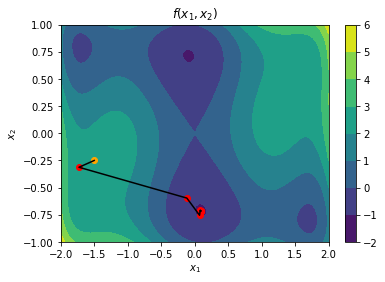

In [18]:
itera, points = back_prop(np.array([-1.5,-0.25]), [])

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points)):
    if i == 0:
        plt.scatter(points[i][0], points[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points[i][0], points[i][1], color='r')
plt.show()

# As extra, try stocastic gradient descent.

Gradient descent with Newton method.
Hessian matrix for our function:
$ Hf(x_1,x_2) =  \begin{pmatrix} 
\frac{\partial^{2} f}{\partial x_{1}^{2}}(x^*) & \frac{\partial^{2} f}{\partial x_{2}x_{1}}(x^*) \\
\frac{\partial^{2} f}{\partial x_{1}x_{2}}(x^*)  & \frac{\partial^{2} f}{\partial x_{2}^{2}}(x^*)  
\end{pmatrix} = \begin{pmatrix} 8-25.2x_1^2+10x_1^4 & 1 \\
1 & -8+48x_2^2 \end{pmatrix}$

Positive definite Hessian check

$(8-25.2x_1^2+10x_1^4 - \lambda)(-8+48x_2^2- \lambda) -1 = 0 \\
\lambda = \frac{\frac{\partial^{2} f}{\partial x_{1}^{2}}+\frac{\partial^{2} f}{\partial x_{2}^{2}} \pm \sqrt{(\frac{\partial^{2} f}{\partial x_{1}^{2}}+\frac{\partial^{2} f}{\partial x_{2}^{2}})^2 -4\frac{\partial^{2} f}{\partial x_{1}^{2}} \frac{\partial^{2} f}{\partial x_{2}^{2}} +4}}{2} $

Gradient descent: $ x^{k+1}=x^k-\alpha^k \nabla f(x^k)$

Newton descent method: $x^{k+1}=x^k+\alpha^k d^k$, where $\nabla^2f(x^k)d^k = -\nabla f(x^k) \\ x^{k+1}=x^k+\alpha^k \nabla^2(x^k)^{-1} \nabla f(x^k) $

In [35]:
def newton(x, points, alpha = 0.001, c=[]):
    dxx = 8-25.2*x[0]**2+10*x[0]**4
    dyy = -8+48*x[1]**2
    l1 = (dxx + dyy + np.sqrt((dxx+dyy)**2 - 4*dxx*dyy+4))/2
    l2 = (dxx + dyy - np.sqrt((dxx+dyy)**2 - 4*dxx*dyy+4))/2
    if l1 > 0 and l2 > 0:
        
        hessian = np.array([[dxx, 1],[1, dyy]])
        if function(x-alpha*np.matmul(np.linalg.inv(hessian),gradf(x))) < function(x):
            points.append(x)
            x = x-alpha*np.matmul(np.linalg.inv(hessian),gradf(x))
            c.append('g')
            if np.sqrt(gradf(x)[0]**2+gradf(x)[1]**2) < 0.0001:
                points.append(x)
                return [len(points)-1, points, c]
            else:
                res = newton(x, points, 1,c)
        else:
            alpha = alpha / 2
            res = newton(x, points,alpha, c)
    else:
        
        if function(x-alpha *gradf(x)) < function(x):
            points.append(x)
            x = x-alpha *gradf(x)
            c.append('r')
            if np.sqrt(gradf(x)[0]**2+gradf(x)[1]**2) < 0.0001:
                points.append(x)
                return [len(points)-1, points, c]
            else:
                res = newton(x, points, 1, c)
        else:
            alpha = alpha / 2
            res = newton(x, points,alpha,c)
    return res

itera, points, c = newton(np.array([-1.5,-0.25]), [])
print(itera, points,c)
        

7 [array([-1.5 , -0.25]), array([-1.5009125, -0.25025  ]), array([-1.72852967, -0.31283419]), array([-0.10818325, -0.59712859]), array([ 0.10117877, -0.75857543]), array([ 0.09029975, -0.71651373]), array([ 0.08984592, -0.71268733]), array([ 0.08984201, -0.71265641])] ['r', 'r', 'r', 'g', 'g', 'g', 'g']


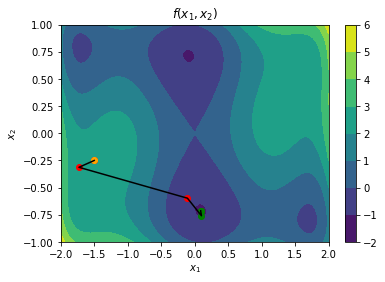

In [45]:
itera, points, c = newton(np.array([-1.5,-0.25]), [])

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(1, len(points)):
    plt.scatter(points[i][0], points[i][1], color=c[i-1])
plt.scatter(points[0][0], points[0][1], color='orange')
plt.show()

# As extra, try stocastic gradient descent.